## Climate-DT Healpix data

This notebook is a simple example of how to use the Healpix data from the Climate-DT dataset. The Climate-DT dataset is a dataset of climate data that is stored in GRIB2 WMO standard format and served via Polytope from the Destination Earth data store. The Healpix grid is a way of storing data on the sphere that is used in astronomy and other fields, where the grid of pixels on the sphere is spread equally on the sphere. 

The Climate-DT dataset contains data on temperature, precipitation, and other climate variables. 
In this notebook, we will show how to read the data from the Climate-DT dataset, interpolate it to a Regular Lat-Lon grid, plot it on a map or transform it to NetCDF or GeoTIFF format.

You can also set POLYTOPE_USER_EMAIL and POLYTOPE_USER_KEY in your environment. Note that the email is not required if using a token-based authentication.

In [50]:
import earthkit.data
import earthkit.maps
import earthkit.regrid


request = {
    'activity': 'ScenarioMIP',
    'class': 'd1',
    'dataset': 'climate-dt',
    'date': '20200102',
    'experiment': 'SSP3-7.0',
    'expver': '0001',
    'generation': '1',
    'levtype': 'sfc',
    'model': 'IFS-NEMO',
    'param': '134/165/166',
    'realization': '1',
    'resolution': 'standard',
    'stream': 'clte',
    'time': '0100', # '0100/0200/0300/0400/0500/0600'
    'type': 'fc'
}

# data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)

2024-04-11 12:43:26 - INFO - Sending request...
{'request': 'activity: ScenarioMIP\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20200102'\n"
            'experiment: SSP3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            'levtype: sfc\n'
            'model: IFS-NEMO\n'
            'param: 134/165/166\n'
            "realization: '1'\n"
            'resolution: standard\n'
            'stream: clte\n'
            "time: '0100'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2024-04-11 12:43:28 - INFO - Request accepted. Please poll http://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/a042efb5-b81d-4368-a67d-c3c2f069df4d for status
2024-04-11 12:43:28 - INFO - Checking request status (a042efb5-b81d-4368-a67d-c3c2f069df4d)...
2024-04-11 12:43:29 - INFO - The current status of the request is 'processing'
2024-04-11 12:43:31 - INFO - The current status of the request is 'processed'


a042efb5-b81d-4368-a67d-c3c2f069df4d:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

ANTLR runtime and generated code versions disagree: 4.13.1!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.11.1


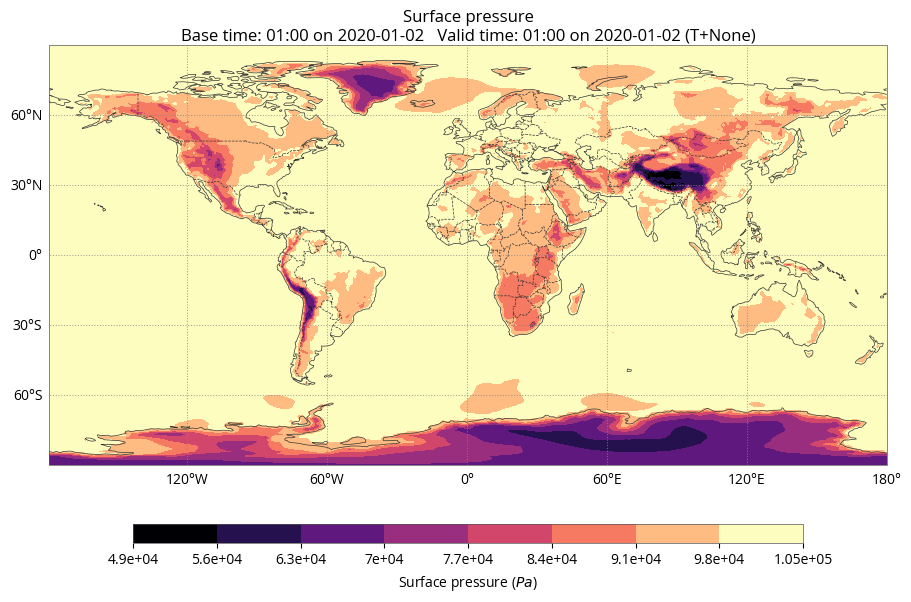

In [51]:
earthkit.maps.quickplot(data[0])

In [54]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sp,surface,0,20200102,100,0,fc,None,healpix
1,ecmf,10u,heightAboveGround,10,20200102,100,0,fc,None,healpix
2,ecmf,10v,heightAboveGround,10,20200102,100,0,fc,None,healpix


In [53]:
# interpolate to a 1x1 degree lat-lon regular grid (in memory)
data_latlon = earthkit.regrid.interpolate(data, out_grid={"grid": [1,1]}, method="linear")

ANTLR runtime and generated code versions disagree: 4.13.1!=4.11.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.11.1


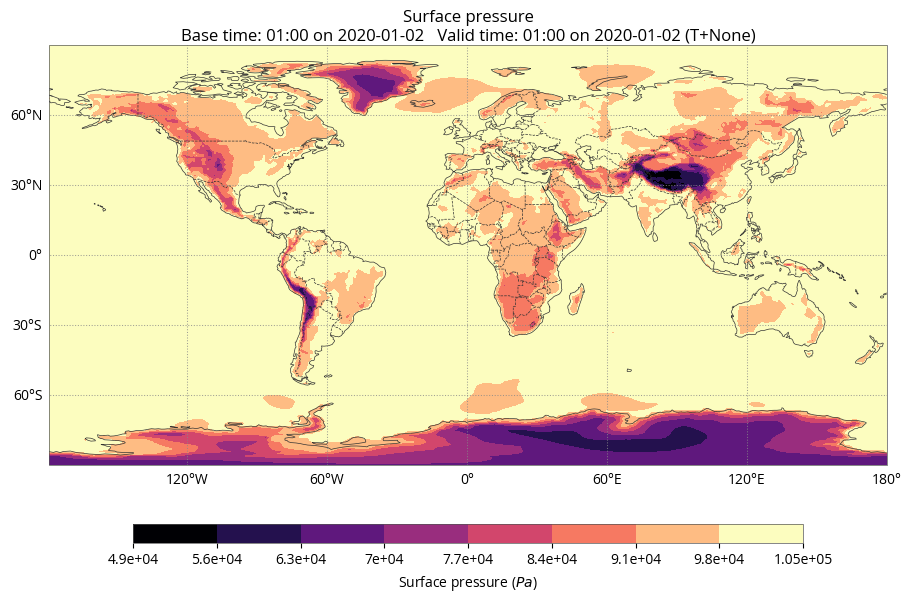

In [55]:
earthkit.maps.quickplot(data_latlon[0])

In [56]:
data_latlon.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sp,surface,0,20200102,100,0,fc,None,regular_ll
1,ecmf,10u,heightAboveGround,10,20200102,100,0,fc,None,regular_ll
2,ecmf,10v,heightAboveGround,10,20200102,100,0,fc,None,regular_ll


In [57]:
data_latlon.save("data_latlon.nc")